# Netflix Movies and TV Shows

# <font color = 'green'> Part 1/2
![image](netflix.png)

## Introduction:
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Data Dictionary and Resources
|Column|Description|
|:----:|:---------:|
|show_id|Unique ID for every Movie / TV show|
|type|Identifier - A Movie or TV Show|
|title|Title of the Movie / Tv Show|
|director|Director of the Movie|
|cast|Actors involved in the movie / show|
|country|Country where the movie / show was produced|
|date_added|Date it was added on Netflix|
|release_year|Actual Release year of the move / show|
|rating|TV Rating of the movie / show|
|duration|Total Duration - in minutes or number of seasons|
|listed_in|Genere|
|description|The summary description|

### Resource: 
[link](https://www.kaggle.com/shivamb/netflix-shows)

## Tasks:
1. **Understanding what content is available in different countries**
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. **Does Netflix has more focus on TV Shows than movies in recent years?**


---

<font color = 'green'> In this notebook, I am addressing the tasks that are **bolded**. Other tasks will be responded in a separate notebook. :)

---

In [112]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap as textwrap
import seaborn as sns
import re
# %matplotlib inline 

In [113]:
# display settings
pd.set_option('display.max_columns', 500)

In [114]:
# load dataset
netflix = pd.read_csv('netflix_titles.csv')

--- 

In [115]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Lets check if we have duplicate rows

In [116]:
netflix.duplicated().sum()

0

- **No duplicates found**

In [117]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- Following columns have Null values
    - `director`
    - `cast`
    - `country`
    - `date_added`
    - `rating`
    - `duration`

Lets look into each of the columns and understand what measures could be taken for the missing values 

In [118]:
# Introduce a list to contain columns with missing values
null_cols = list()

# Append the column names
for col in netflix.columns:
    if netflix[col].isnull().any() == True:
        null_cols.append(col)

In [119]:
for col in netflix[null_cols]:
    print('-'*120)
    print(col)
    print('--> NUMER OF NULL VALUES: ', netflix[null_cols][col].isnull().sum())
    print(netflix[null_cols][col].value_counts(dropna=False))

------------------------------------------------------------------------------------------------------------------------
director
--> NUMER OF NULL VALUES:  2634
NaN                       2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
                          ... 
Lee Yoon-jung                1
Michael Mayer                1
Sunny Lau                    1
Bolanle Austen-Peters        1
Jun-seong Kim                1
Name: director, Length: 4529, dtype: int64
------------------------------------------------------------------------------------------------------------------------
cast
--> NUMER OF NULL VALUES:  825
NaN                                                                                                                                      825
David Attenborough                                                                                                                        19
Vatsal Dubey, J

- Among the columns with missing values, there is a considerable gap among the numbers. So there might be a need of addressing them separately.
    - Columns like `director`, `cast`, `country` consist of 2634, 825, and 831 null values.
    - Whereas the columns `date_added`, `rating`, and `duration` contain 10, 4, and 3 null values. 

Lets move on to figuring out the cardinality of our columns

In [120]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

- Columns such as `type`, `rating`, and `release_year` contain 2, 17, and 74,  i-e, fewer than 100 unique values out of 8807 sample points

---

Since our dataset contains a lot of textual information and there are not many columns either, lets take peeks into each og the columns to establish familiarity with what kind of information column is giving and how the column is structured

## Peeking the columns induvidually

**The column `show_id`**

In [121]:
netflix['show_id'].nunique()

8807

- The show id is a unique identifiier for each of the sample. Therefore, 100% unqiue

In [122]:
# Check if all show IDs begin with the letter 's', 
netflix.show_id.str.startswith('s').all()

True

In [123]:
# ... and followed by a numeric pattern 
netflix['show_id'].str.contains('^.*[s](\d+)').all()

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


True

- indeed, our `show_id`  begin with the letter s and followed by some numbers
- **There is no null value**

**The column `type`**

In [124]:
netflix.type.value_counts(dropna=True)

Movie      6131
TV Show    2676
Name: type, dtype: int64

- The column `type` classifies the sample for either being a *Movie* or a *TV Show*, hence a **Categorical Variable**
- **No Null value found!**

#### The column `title`

In [125]:
netflix.title.value_counts()

Monster High: Ghouls Rule                                  1
State of Play                                              1
Milkwater                                                  1
LEGO Ninjago: Masters of Spinjitzu: Day of the Departed    1
Pulp Fiction                                               1
                                                          ..
Bill Burr: I'm Sorry You Feel That Way                     1
I Am Jane Doe                                              1
Dries                                                      1
The Magic School Bus Rides Again The Frizz Connection      1
Romeo Akbar Walter                                         1
Name: title, Length: 8807, dtype: int64

In [126]:
netflix['title'].nunique()

8807

- These are the titles of the each sample, they are 100% unique. 
- *This leads us to consider dropping `show_id`*

#### The column `director`

In [127]:
netflix['director'].value_counts(dropna=False)

NaN                       2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
                          ... 
Lee Yoon-jung                1
Michael Mayer                1
Sunny Lau                    1
Bolanle Austen-Peters        1
Jun-seong Kim                1
Name: director, Length: 4529, dtype: int64

- 2634 movies / TV shows do not have a director mentioned
- We can see that for some Movies / TV Shows, we can have more than one director. 
Lets check it

In [128]:
# Since we have some null values, we first replace them with a string, convert into object, split at comma, and calculate lenght
# ser_director shows INVALID frequency for movies/TV shows with 1 director.
ser_director = pd.Series(netflix['director'].replace(np.nan, 'false_string!').astype('object').str.split(',').apply(lambda x: len(x)))

# Getting a series of the frequency table.
ser_num_directors = pd.Series(ser_director.value_counts())

# an important correction!. Subtracting the missing values masked with n/a
ser_num_directors[1] = ser_num_directors[1] - 2634

ser_num_directors.sort_index()

1     5559
2      542
3       37
4       15
5        7
7        2
8        1
9        2
10       3
11       2
12       2
13       1
Name: director, dtype: int64

- We have 2634 samples that do not have a director(s) name stated. Therefore, there are 2634 NaNs
- Around 5559 movies / TV shows have one director, followed by 545 movies / TV shows that have a pair of directors.
- In few cases, the number of directors are much higher and go as high as 13.

#### The column `cast`

In [129]:
netflix['cast'].value_counts(dropna=False)

NaN                                                                                                                                      825
David Attenborough                                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                   14
Samuel West                                                                                                                               10
Jeff Dunham                                                                                                                                7
                                                                                                                                        ... 
Aarna Sharma, Aaryansh Malviya, Mikail Gandhi, Palash Kamble, Jishu Sengupta, Palomi Ghosh, Purab Kohli, Sameer Kochhar, Sara Gesawat      1
Jaime Maussan

In [130]:
# Since we have some null values, we first replace them with a string, convert into object, split at comma, and calculate lenght
# ser_cast shows INVALID frequency for movies/TV shows with 1 actor.
ser_cast = pd.Series(netflix['cast'].replace(np.nan, 'false_string!').astype('object').str.split(',').apply(lambda x: len(x)))

# Getting a series of the frequency table.
ser_num_cast = pd.Series(ser_cast.value_counts(bins=np.arange(0,60,5)))

# an important correction!. Subtracting the missing values masked with n/a
ser_num_cast.iloc[1] = ser_num_cast.iloc[1] - 825

ser_num_cast.sort_index()

(-0.001, 5.0]    1917
(5.0, 10.0]      4546
(10.0, 15.0]     1212
(15.0, 20.0]      210
(20.0, 25.0]       52
(25.0, 30.0]       19
(30.0, 35.0]       10
(35.0, 40.0]        7
(40.0, 45.0]        4
(45.0, 50.0]        5
(50.0, 55.0]        0
Name: cast, dtype: int64

- We have a range of the cast size for different movies and TV shows ranging from 1 to 50!, however. aorund 6500 movies/TV shows contain less than 10 actors participating. 
- Around 8000 movies have the cast size less than of 20, meaning that less than or equal to 20 actors performed in the movie/TV show

#### The column `country`

In [131]:
netflix['country'].value_counts(dropna=False)

United States                               2818
India                                        972
NaN                                          831
United Kingdom                               419
Japan                                        245
                                            ... 
India, Turkey                                  1
Denmark, China                                 1
France, South Korea, Japan                     1
United States, France, Mexico                  1
Ireland, United Kingdom, France, Germany       1
Name: country, Length: 749, dtype: int64

- 831 movie/TV shows do not have a country of production stated. **So 831 NaNs**
- There are movies/TV shows that are produced in multiple countries.
- For others, most of the movies/TV shows are produced in USA alone.

In [132]:
# Lets take all the mentions of all the countries in a list
countries = list()


for row in netflix['country'].dropna().str.split(','): # Dropped NaNs and splitted across commas
    for item in row:
        countries.append(item)

# Building a counter to get frequency table
dict_countries = {}
for country in countries:
    country = str(country.strip()) # Trimming unwanted spaces 
    if country not in dict_countries:
        dict_countries[country] = 1
    else:
        dict_countries[country] += 1

# Please note that the dictionary doesn't mention the NaNs    
# Dictionaries are orderless, to sort it we make it a series
ser_countries = pd.Series(dict_countries)
ser_countries.sort_values(ascending=False)

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Mongolia             1
Angola               1
Bahamas              1
Malawi               1
Montenegro           1
Length: 123, dtype: int64

In [133]:
%store ser_countries 

Stored 'ser_countries' (Series)


- Around 3690 Movies / TV Shows were produced in **United States**, followed by **India**, where around 1046 Movies / TV Shows were produced

#### The column `date_added`

In [134]:
netflix['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [135]:
# Changing the column into datetime
netflix['date_added'] = netflix['date_added'].apply(pd.to_datetime)

In [136]:
netflix['date_added'].isnull().sum()

10

- We have **10 NaNs** in `date_added`

#### The column `release_year`

In [137]:
netflix['release_year'].value_counts(dropna=False)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1925       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [138]:
netflix['release_year'].isnull().sum()

0

In [139]:
print('The latest year of release is',netflix['release_year'].max())

The latest year of release is 2021


In [140]:
print('The earliest year of release is', netflix['release_year'].min())

The earliest year of release is 1925


- No Null values in `release_year`
- The latest year of a release is 2021, and the earliest year of the release is 1925

#### The column `rating`

In [141]:
netflix['rating'].value_counts(dropna=False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

- This is a categorical column. 
- **4 null values** can be found 
- We can see some bad entries. There are mentions of entries with a regex pattern *'\d[2]\s(min)'*, This pattern is rather found in the `duration` column. So we will consider them to be misplaced

So lets check these

In [142]:
# Checking those possibly 'misplaced' values
netflix[netflix['rating'].str.contains('min') == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- The `duration` column in vacant in these samples. There is a strong possibility that the values in `ratings` actually belonged to `duration`. We will fix it

In [143]:
# Take out this troublesome part
slice1 = netflix[netflix['rating'].str.contains('min') == True].copy()

# Place the values correctly
netflix['duration'].loc[slice1.index] = slice1['rating'].copy()

# Remove the misplaced values
netflix['rating'].loc[slice1.index] = np.nan

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [144]:
# Confirmation
netflix.iloc[slice1.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


- Successful replacement!

#### The column `duration`

In [145]:
netflix['duration'].isnull().sum()

0

In [146]:
netflix['duration'].value_counts(dropna=False)

1 Season      1793
2 Seasons      425
3 Seasons      199
90 min         152
94 min         146
              ... 
201 min          1
214 min          1
17 Seasons       1
237 min          1
10 min           1
Name: duration, Length: 220, dtype: int64

So apparently, we have the entries ending up with either **Season(s)** or **min**. Lets corraborate it as well. 

In [147]:
ser_duration_check = netflix['duration'].dropna().str.extract('(\s\w+)') 
ser_duration_check[0].value_counts(dropna=False)

 min        6131
 Season     1793
 Seasons     883
Name: 0, dtype: int64

- Thats Correct! All the data in the column `duration` ends up with either min (minutes) or Season(s)

Usually the length of movies is described in hours or minutes (minutes in our case) whereas the TV Shows are described as the number of seasons, episodes etc. I strongly feel that this is the case here as well. Lets check it out 

In [148]:
netflix[netflix['type'] == 'Movie']['duration'].str.contains('min').all()

True

- All the `duration` of the **movies** are in minutes, *min*

In [149]:
netflix[netflix['type'] == 'TV Show']['duration'].str.contains('Season').all()

True

- All the `duration` of the **TV Shows** are in Season(s), i.e. either *Season* or *Seasons*

#### The column `listed_in`

In [150]:
netflix['listed_in'].isnull().sum()

0

In [151]:
# Lets take all the mentions of all the genres in a list
genres = list()


for row in netflix['listed_in'].dropna().str.split(','): # Dropped NaNs and splitted across commas
    for item in row:
        genres.append(item)

# Building a counter to get frequency table
dict_genres = {}
for genre in genres:
    genre = str(genre.strip()) # Trimming unwanted spaces 
    if genre not in dict_genres:
        dict_genres[genre] = 1
    else:
        dict_genres[genre] += 1

# Please note that the dictionary doesn't mention the NaNs    
# Dictionaries are orderless, to sort it we make it a series
ser_genre = pd.Series(dict_genres)
ser_genre = ser_genre.sort_values(ascending=False)

In [152]:
ser_genre

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

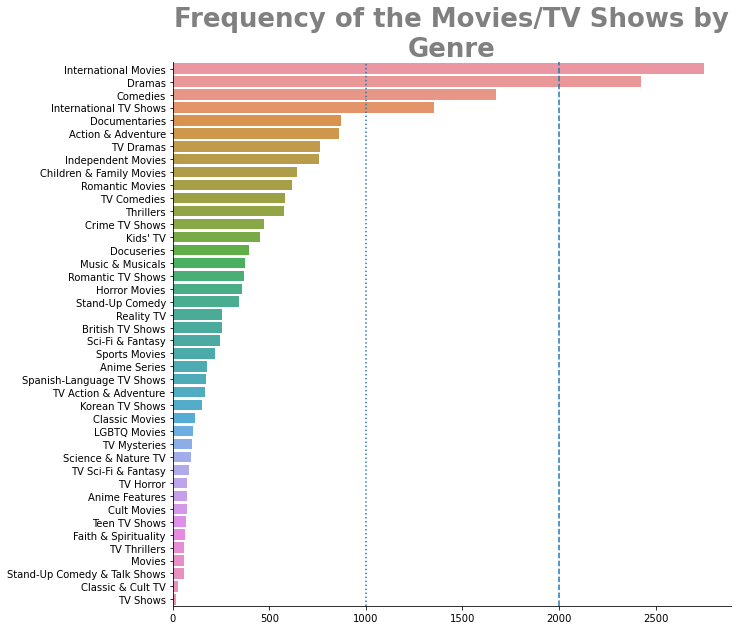

In [153]:
plt.figure(figsize=(10,10))
sns.barplot(x=ser_genre.values, y=ser_genre.index)
plt.axvline(1000, linestyle=':')
plt.axvline(2000, linestyle='--')
plt.title('Frequency of the Movies/TV Shows by\nGenre', weight='bold', fontsize=26, color='grey')
sns.despine()

- Genres such as International Movies, and Dramas look very popular with each having 2000+ Movies / TV Shows associated
- Next comes the genres such as Comedies, and International TV Shows with each having 1000+ Movies / TV Shows associated

P.S 2000, and 1000 are just arbitrary numbers

#### The column `description`

In [154]:
netflix['description'].isnull().sum()

0

In [155]:
netflix['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

- The column contains large texts and has no missing values

---

## Does Netflix has more focus on TV Shows than movies in recent years?

In [156]:
# Extract year from the date_added
netflix['year_added'] = netflix['date_added'].dt.year

In [157]:
ser_ans4 = netflix.groupby(['year_added','type'])['type'].count()
ser_ans4

year_added  type   
2008.0      Movie         1
            TV Show       1
2009.0      Movie         2
2010.0      Movie         1
2011.0      Movie        13
2012.0      Movie         3
2013.0      Movie         6
            TV Show       5
2014.0      Movie        19
            TV Show       5
2015.0      Movie        56
            TV Show      26
2016.0      Movie       253
            TV Show     176
2017.0      Movie       839
            TV Show     349
2018.0      Movie      1237
            TV Show     412
2019.0      Movie      1424
            TV Show     592
2020.0      Movie      1284
            TV Show     595
2021.0      Movie       993
            TV Show     505
Name: type, dtype: int64

In [158]:
df_ans4 = ser_ans4.unstack()
df_ans4

type,Movie,TV Show
year_added,,
2008.0,1.0,1.0
2009.0,2.0,NaN
2010.0,1.0,NaN
2011.0,13.0,NaN
2012.0,3.0,NaN
2013.0,6.0,5.0
2014.0,19.0,5.0
2015.0,56.0,26.0
2016.0,253.0,176.0


In [159]:
# Lets fill NaNs with 0 for better operation. By looking at the trends, we can see that NaNs mean no entry
df_ans4.fillna(0, inplace=True)

# reset index to make year_added a columm
df_ans4 = df_ans4.reset_index()

# melt to achieve a longer format for seaborn's hue to work
ans4 = pd.melt(df_ans4, id_vars='year_added', value_vars=['Movie','TV Show'], var_name='type')

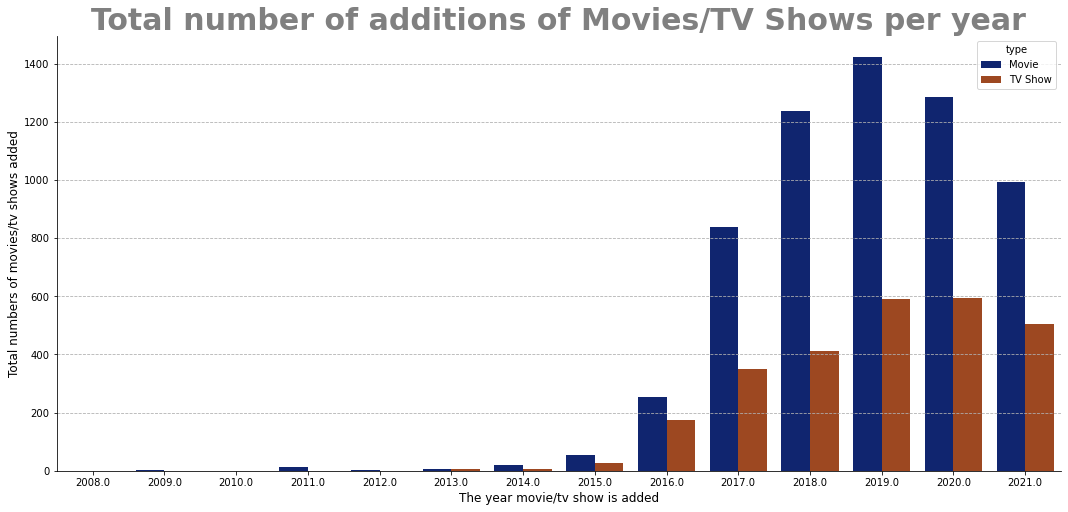

In [160]:
# plot
plt.figure(figsize=(18,8))
sns.barplot(data=ans4, x='year_added', y='value', hue='type', palette='dark')
plt.xlabel('The year movie/tv show is added', fontsize=12)
plt.ylabel('Total numbers of movies/tv shows added', fontsize=12)
plt.title('Total number of additions of Movies/TV Shows per year', 
          weight='bold', color='grey',
          fontsize=30)
plt.grid(axis='y', ls='--')
sns.despine()


### Findings:
- From the graph above, we can not say that Netflix has been made any dramatic switch of focus from `Movies` to `TV Shows`. Apparetnly, the Number of TV Shows remain roughly propotionate to the total number of additions (Movies + TV Shows).

To look further into this to check for gradual shift of focus (if any), lets relate the number of TV Shows added with the total number of additions, depicted as percentage of TV Shows `tv_shows_as_pc` 


In [161]:
df_ans4['total'] = df_ans4['TV Show'] + df_ans4['Movie']
df_ans4['tv_shows_as_pc'] = df_ans4['TV Show']/df_ans4['total']*100
df_ans4

type,year_added,Movie,TV Show,total,tv_shows_as_pc
0,2008.0,1.0,1.0,2.0,50.000000
1,2009.0,2.0,0.0,2.0,0.000000
2,2010.0,1.0,0.0,1.0,0.000000
3,2011.0,13.0,0.0,13.0,0.000000
4,2012.0,3.0,0.0,3.0,0.000000
5,2013.0,6.0,5.0,11.0,45.454545
6,2014.0,19.0,5.0,24.0,20.833333
7,2015.0,56.0,26.0,82.0,31.707317
8,2016.0,253.0,176.0,429.0,41.025641
9,2017.0,839.0,349.0,1188.0,29.377104


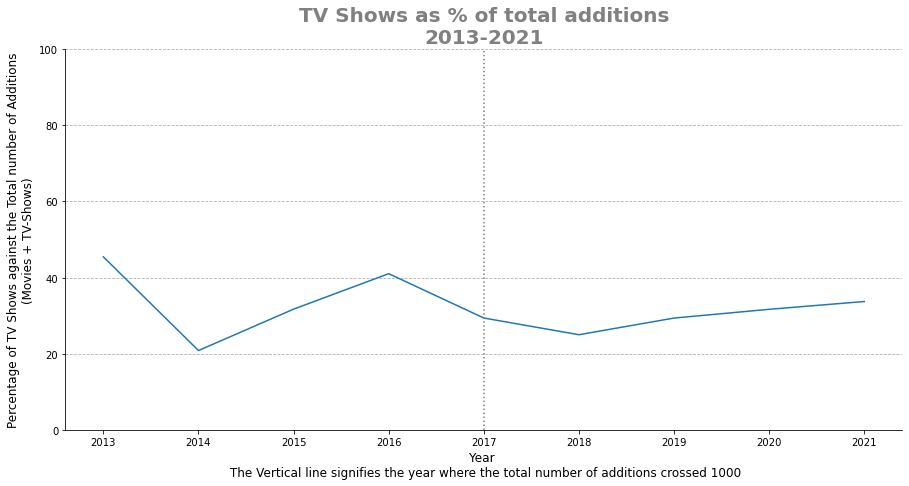

In [162]:
# plot
plt.figure(figsize=(15,7))
sns.lineplot(data=df_ans4.iloc[5:], x='year_added', y='tv_shows_as_pc')
plt.ylim(0,100)
plt.title('TV Shows as % of total additions\n2013-2021', weight='bold', 
         color='grey', fontsize=20)
plt.ylabel('Percentage of TV Shows against the Total number of Additions\n(Movies + TV-Shows)', fontsize=12)
plt.xlabel('Year \n The Vertical line signifies the year where the total number of additions crossed 1000', fontsize=12)
plt.grid(axis='y', ls='--')
plt.axvline(x=2017, color='grey',ls=':')
sns.despine()

plt.show()


### Conclusion: 
- Indeed, It does look like that there has been a gradually increasing focus on TV Shows since 2018.
    - In 2018, the TV Shows were around 25% of the total additions
    - Whereas by 2021, this has increased to nearly 34%. Moreover, the increase has been consistent. 
    
---

## Preparating to understand what content is available in different countries
<font color='red'>It is ambiguous that what exactly is meant by *content* and exactly which columns to look for, the following columns appear to be addressing the question. 

Looking closer to the question a second ambiguity is raised over the word *available*. In our dataset, we find that the column `country` is about **where the Movie / TV show was produced**. We do not have any direct information given about a Movie / TV show's availability in any specific region or country. 
 For example, under normal circumstances, a movie produced in U.S should be available in U.A.E unless stated otherwise. Unfortunately, we do not have such information given

|Column|Description|
|:----:|:---------:|
|`countries`| Which Country(ies) the movie/show was produced (can be more than one)|
|`type`| Type; either a movie or a TV show|
|`rating`| which is the right audience?|
|`duration`| Duration of the Movie or the TV Show|
|`listed_in`| genre(s) (can be more than one)|


To respond to this, we need to further process the columns mentioned above. 

Lets begin with it


### `Country` - further processing

In [163]:
# Dropping NaNs, splitting at comma, and returning with length of the number of countries
netflix['total_countries'] = netflix['country'].dropna().str.split(',').apply(lambda x: len(x))

In [164]:
netflix['total_countries'].value_counts()

1.0     6656
2.0      873
3.0      273
4.0      114
5.0       37
6.0       14
7.0        5
8.0        2
10.0       1
12.0       1
Name: total_countries, dtype: int64

Lets see how many total countries we have in our data

In [165]:
ser_countries

United States    3690
South Africa       62
India            1046
Ghana               5
Burkina Faso        1
                 ... 
Sudan               1
Panama              1
Uganda              1
East Germany        1
Montenegro          1
Length: 123, dtype: int64

- Although we have the data from 123 countries, some countries appear to have very few or just a single Movie / TV show produced.


To perform an analysis, we will pick the countries with atleast a handy number of productions. 

In [166]:
ser_countries[ser_countries > 100]

United States     3690
India             1046
United Kingdom     806
Germany            226
Mexico             169
Turkey             113
Australia          160
France             393
China              162
Canada             445
Japan              318
Nigeria            103
Spain              232
South Korea        231
Hong Kong          105
Egypt              117
dtype: int64

In [167]:
top_countries = ser_countries[ser_countries > 100].index

As mentioned earlier, there are some Movies / TV Shows which were produced in multiple countries. Let's form an exploded version of our dataframe for all such movies and filter for only the top countries 

In [168]:
# Initiate a newer version, copy
netflix_ed1 = netflix.copy()

# Drop Null Values wrt country
netflix_ed1 = netflix_ed1[netflix_ed1['country'].notnull()]

# Split on ', '
netflix_ed1['country'] = netflix_ed1['country'].str.split(', ')

# Explode on country
netflix_ed1 = netflix_ed1.explode('country')

# Filter for the top_countries
netflix_ed1 = netflix_ed1[netflix_ed1['country'].isin(top_countries)]

<font color = 'grey'>
    
- So now we have another version of the original dataframe, called `netflix_ed1`. It is formed by following actions on the column **`country`**
    - With notnulls wrt the column
    - with the countries in `top_countries` only
    - with each country splitted at ', '
    - with exploded at the column to have every country involved in the production its own row

### `Rating` - further processing

Below is a description for each of the rating:
Resources: [1](http://www.tvguidelines.org/resources/TV_Parental_Guidelines_Brochure.pdf), [2](https://support.google.com/moviestvpartners/answer/6318206?hl=en), [3](https://rating-system.fandom.com/wiki/TV_Parental_Guidelines), [4](https://forums.stevehoffman.tv/threads/what-does-ur-and-nr-really-means.89634/), [5](https://www.quora.com/What-does-the-NR-in-rating-system-mean), [6](https://atlascinemas.net/ratings.html)

|Rating|Description|
|:----:|:---------:|
|TV-Y|	All Children|	 
|TV-Y7|	Directed to Older Children|	 
|TV-Y7-FV|	Directed to Older Children - Fantasy Violence|	 
|TV-G|	General Audience|
|TV-PG|	Parental Guidance Suggested|	 
|TV-14|	Parents Strongly Cautioned| 
|TV-MA|	Mature Audience Only|
|G| Appropriate for people of all ages|
|PG-13| Parents Strongly Cautioned. Equivalent to TV=14|
|R| Strongly cautioned for under 17|
|NC-17| Not for under 17, stronger than R|
|NR| Film not been submitted for a rating or is an uncut version of a film that was submitted|
|UR| Film not been submitted for a rating or is an uncut version of a film that was submitted|




It seems pertinent to introduce a derived column `audience` from `ratings`. 

Using the following [information in the table](https://www.netnanny.com/blog/how-to-set-netflix-parental-controls/) taken from the [Net Nanny](www.netnanny.com), an industry leader in parental control software,

Lets figure out relevant audiences for each rating. 

|Audience| Ratings |
|:------:|:-------:|
|Little Kids| G, TV-Y, TV-G|
|Older Kids| PG, TV-Y7, TV-Y7-FV, TV-PG|
|Teens| PG-13, TV-14|
|Mature| R, NC-17, TV-MA|
|Undefined| NR, UR|

In [169]:
# Setting up a mapping dictionary to map rating to its audience
rating_map = {}

little_kids = ['G', 'TV-Y', 'TV-G']
for item in little_kids:
    rating_map[item] = 'Little Kids'
older_kids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
for item in older_kids:
    rating_map[item] = 'Older Kids'
teens = ['PG-13', 'TV-14']
for item in teens:
    rating_map[item] = 'Teens'
mature = ['R', 'NC-17', 'TV-MA']
for item in mature:
    rating_map[item] = 'Mature'
undefined_or_na = ['NR', 'UR', np.nan]
for item in undefined_or_na:
    rating_map[item] = 'Undefined or N/A'


In [170]:
netflix['audience'] = netflix['rating'].map(rating_map)

In [171]:
netflix['audience'].value_counts(dropna=False)

Mature              4009
Teens               2650
Older Kids          1490
Little Kids          568
Undefined or N/A      90
Name: audience, dtype: int64

### `Type` - further processing

All the items in our list can be categorized into two types, namely

- Movies
- TV Shows.

Lets separate them 

In [172]:
movies = netflix[netflix['type'] == 'Movie'].copy()
tv = netflix[netflix['type'] == 'TV Show'].copy()

### `Duration` - further processing 


<font color = 'grey'> Reminder: We are splitting the the filtered version of the `netflix` DataFrame, that is `netflix_1`. This dataframe was filitered to have only the countries that have atleast 100 productions for each. 
To perform the split on the whole dataset, please use `netlfix`

Another thing that can be achieved after having the DataFrame splitted is that we can trim the `duration` to be strictly numerical. This can be performed by removing strings 'min' and 'Season(s)'

In [173]:
# Take out last 4 chars that include ' min' and convert to int
# use loc to avoid SettingWithCopy warning
movies.loc[:,'duration'] = movies.loc[:,'duration'].str[:-4].copy().astype(int)

In [174]:
# Split the string at space and take the first part and convert to int
# use loc to avoid SettingWithCopy warning
tv.loc[:,'duration'] = tv.loc[:,'duration'].str.split(' ').str[0].copy().astype(int)

In [175]:
movies[movies['duration'] == 3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,total_countries,audience
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019.0,1.0,Little Kids


In [176]:
movies.describe()['duration']

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [177]:
tv.describe()['duration']

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

In [178]:
tv['duration'].value_counts()

1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
15       2
11       2
12       2
17       1
Name: duration, dtype: int64

In [179]:
tv['duration'].value_counts().cumsum()

1     1793
2     2218
3     2417
4     2512
5     2577
6     2610
7     2633
8     2650
9     2659
10    2666
13    2669
15    2671
11    2673
12    2675
17    2676
Name: duration, dtype: int64

- Movies:
    - A mean duration (in minutes) for a movie is around 100 minutes
    - The shortest movie is just about 3 minutes long, whereas the longest movie is of 312 minutes
    
- TV Shows:
    - TV Shows duration is defined by the number of seasons they have
    - Most of the TV Shows are a single season long
    - Around 90% of the TV Shows are no longer than of 3 seasons

### `listed_in` - further processing

<font color = 'grey'> The column has a similar structure as `country`. We need to explode it on the column `listed_in` in the same fashion. We will use the original df, the `netflix` because `netflix_ed1` has already been exploded on another column. Further explosion will be misleading 

In [180]:
# Initiate a newer version, copy
netflix_ed2 = netflix.copy()

# Drop Null Values wrt country
netflix_ed2 = netflix_ed2[netflix_ed2['listed_in'].notnull()]

# Split on ', '
netflix_ed2['listed_in'] = netflix_ed2['listed_in'].str.split(', ')

# Explode on country
netflix_ed2 = netflix_ed2.explode('listed_in')

# Filter for the top_countries
netflix_ed2 = netflix_ed2[netflix_ed2['country'].isin(top_countries)]

## Understanding what content is available in different countries

**Approach:**

We will try to analyse from two perspectives
1. What content is made in the countres?
2. How could the content be compared across the top countries where the content is made?


### Analysing each country
#### The following function `profile_country()` will help visualize the following key statistics from any country. Each statistics are shown separately of the Movies and the TV Shows for the mentioned country
1. Durations
2. Most common ratings
3. Audiences
4. Genres (single, ungrouped)
5. Genres (default, grouped)

In [181]:
def profile_country(df, country):
    '''
    This function returns induvidual profile for any country by separating the 
    Movies and TV Shows produced in the country.
    Profile comprises on visualizations for the requested country on
    1. Duration 
    2. Rating
    3. Audience
    4. Genres 
    5. Grouped Genres
    
    Args:
        df: The DataFrame
        country: The country profile is required for
        
    Returns:
        Variety Paired plots for Movies and TV Shows with plots for the movies
        on RHS and the plots for the TV Shows on the LHS
    '''
    # Drop rows where country is not given specific df
    df.dropna(subset=['country'], inplace=True)
    # types (Movies and TV Shows)
    typess = pd.Series(df[df['country'].str.contains(country)]['type'].value_counts())
    # All productions
    sum_productions = typess.sum() # sum the types
    
    movies, tv = df[df['type'] == 'Movie'], df[df['type'] == 'TV Show']
    
    # Duration: Movies, TV Shows
    duration_movie = []
    duration_tv = []

    for index, row in netflix.iterrows():
        types, country, duration = row[1], row[5], row[9]
        if (country == country) and (types == 'Movie'):
            duration_m = int(str(duration)[:-4])
            duration_movie.append(duration_m)
        elif (country == country) and (types == 'TV Show'):
            duration_t = int((duration).split(' ')[0])
            duration_tv.append(duration_t)

    # Rating: Movies, TV Shows
    movies = movies.dropna(subset=['rating']).copy()
    tv = tv.dropna(subset=['rating']).copy()
    movies_ratings = pd.Series(movies[movies['country'].str.contains(country)]['rating'].value_counts().sort_values(ascending = False))
    tv_ratings = pd.Series(tv[tv['country'].str.contains(country)]['rating'].value_counts().sort_values(ascending = False))
    
    # Audience: Movies, TV Shows 
    movies_audience = pd.Series(movies[movies['country'].str.contains(country)]['audience'].value_counts().sort_values(ascending = False))
    tv_audience = pd.Series(tv[tv['country'].str.contains(country)]['audience'].value_counts().sort_values(ascending = False)) 
    


    # Function to get elements within the lists
    def get_items(df):
        '''
        This function accesses the elements within
        the lists inside the list and returns with
        dictionaries (later converted into Series)
        giving frequency for each of the element.
        args:
            df: The DataFrame
        returns:
            ser_genre_dict: Series of the count of 
                            grouped elements  
            ser_induvidual_genre_dict: Series of the
                            count of the elements
                            independent of the group.
        '''
        genres_dict = {}
        induvidual_genres_dict = {}
        for index,row in df.iterrows():
            country, genres, genres_list, induvidual_genre_list = row[5], row[10], [], []

            if country in country:
                genres_list.append(genres)
            for item in genres_list:
                if item in genres_dict:
                    genres_dict[item] += 1
                else:
                    genres_dict[item] = 1
            for element in genres_list:
                element = element.split(',')
                for item in element:
                    item = item.strip()
                    induvidual_genre_list.append(item)
                    if item in induvidual_genres_dict:
                        induvidual_genres_dict[item] += 1
                    else: 
                        induvidual_genres_dict[item] = 1

        ser_genres_dict = pd.Series(genres_dict).sort_values(ascending=False)
        ser_induvidual_genres_dict = pd.Series(induvidual_genres_dict).sort_values(ascending=False)
        return ser_genres_dict, ser_induvidual_genres_dict
    
    movies_genres = get_items(movies)
    tv_genres = get_items(tv)
    
    fig, axes = plt.subplots(5,2, figsize=(18,35))
    
    sns.boxplot(ax=axes[0,0], x= duration_movie)
    axes[0,0].set_title('Movies: Duration', weight='bold', fontsize=15)
    sns.boxplot(ax=axes[0,1], x= duration_tv)
    axes[0,1].set_title('TV Shows: Duration', weight='bold', fontsize=15)
    
    sns.barplot(ax=axes[1,0], x=movies_ratings[:10].index, y=movies_ratings[:10].values)
    axes[1,0].set_title('Movies: Most common Ratings', weight='bold', fontsize=15)
    sns.barplot(ax=axes[1,1], x=tv_ratings[:10].index, y=tv_ratings[:10].values)
    axes[1,1].set_title('TV Shows: Most common Ratings', weight='bold', fontsize=15)
    
    axes[2,0].pie(explode=np.repeat(0.1,len(movies_audience)),
                  x=movies_audience, 
                  labels=movies_audience.index, 
                  radius=1.1,
                  autopct = '%0.1f%%',
                  labeldistance=None,
                  shadow=True)
    axes[2,0].legend(bbox_to_anchor=(1.0, 1.10))
    axes[2,0].set_title('Movies: Audiences', weight='bold', fontsize=15)
    
    axes[2,1].pie(explode=np.repeat(0.1,len(tv_audience)), 
                  x=tv_audience, 
                  labels=tv_audience.index, 
                  radius=1.1, 
                  autopct = '%0.1f%%',
                  shadow=True,
                  labeldistance=None)
    axes[2,1].legend(bbox_to_anchor=(1.0, 1.10))
    axes[2,1].set_title('TV Shows: Audiences', weight='bold', fontsize=15)

    movie_ind_labels = movies_genres[1][:10].index
    sns.barplot(ax=axes[3,0],y=movie_ind_labels, x=movies_genres[1][:10])
    axes[3,0].set_yticklabels([textwrap.fill(label, 15) for label in movie_ind_labels])
    axes[3,0].set_title('Movies: Most common Genres', weight='bold', fontsize=15)


    tv_ind_labels = tv_genres[1][:10].index
    sns.barplot(ax=axes[3,1],y=tv_ind_labels, x=tv_genres[1][:10])
    axes[3,1].set_yticklabels([textwrap.fill(label, 15) for label in tv_ind_labels])
    axes[3,1].set_title('TV Shows: Most common Genres', weight='bold', fontsize=15)

    
    movie_labels = movies_genres[0][:10].index
    sns.barplot(ax=axes[4,0],y=movie_labels, x=movies_genres[0][:10])
    axes[4,0].set_yticklabels([textwrap.fill(label, 25) for label in movie_labels])
    axes[4,0].set_title('Movies: Most commonly Grouped Genres', weight='bold', fontsize=15)

    tv_labels = tv_genres[0][:10].index
    sns.barplot(ax=axes[4,1],y=tv_labels, x=tv_genres[0][:10])
    axes[4,1].set_yticklabels([textwrap.fill(label, 25) for label in tv_labels])
    axes[4,1].set_title('TV Shows: Most commonly Grouped Genres', weight='bold', fontsize=15)


    sns.despine()

    
    

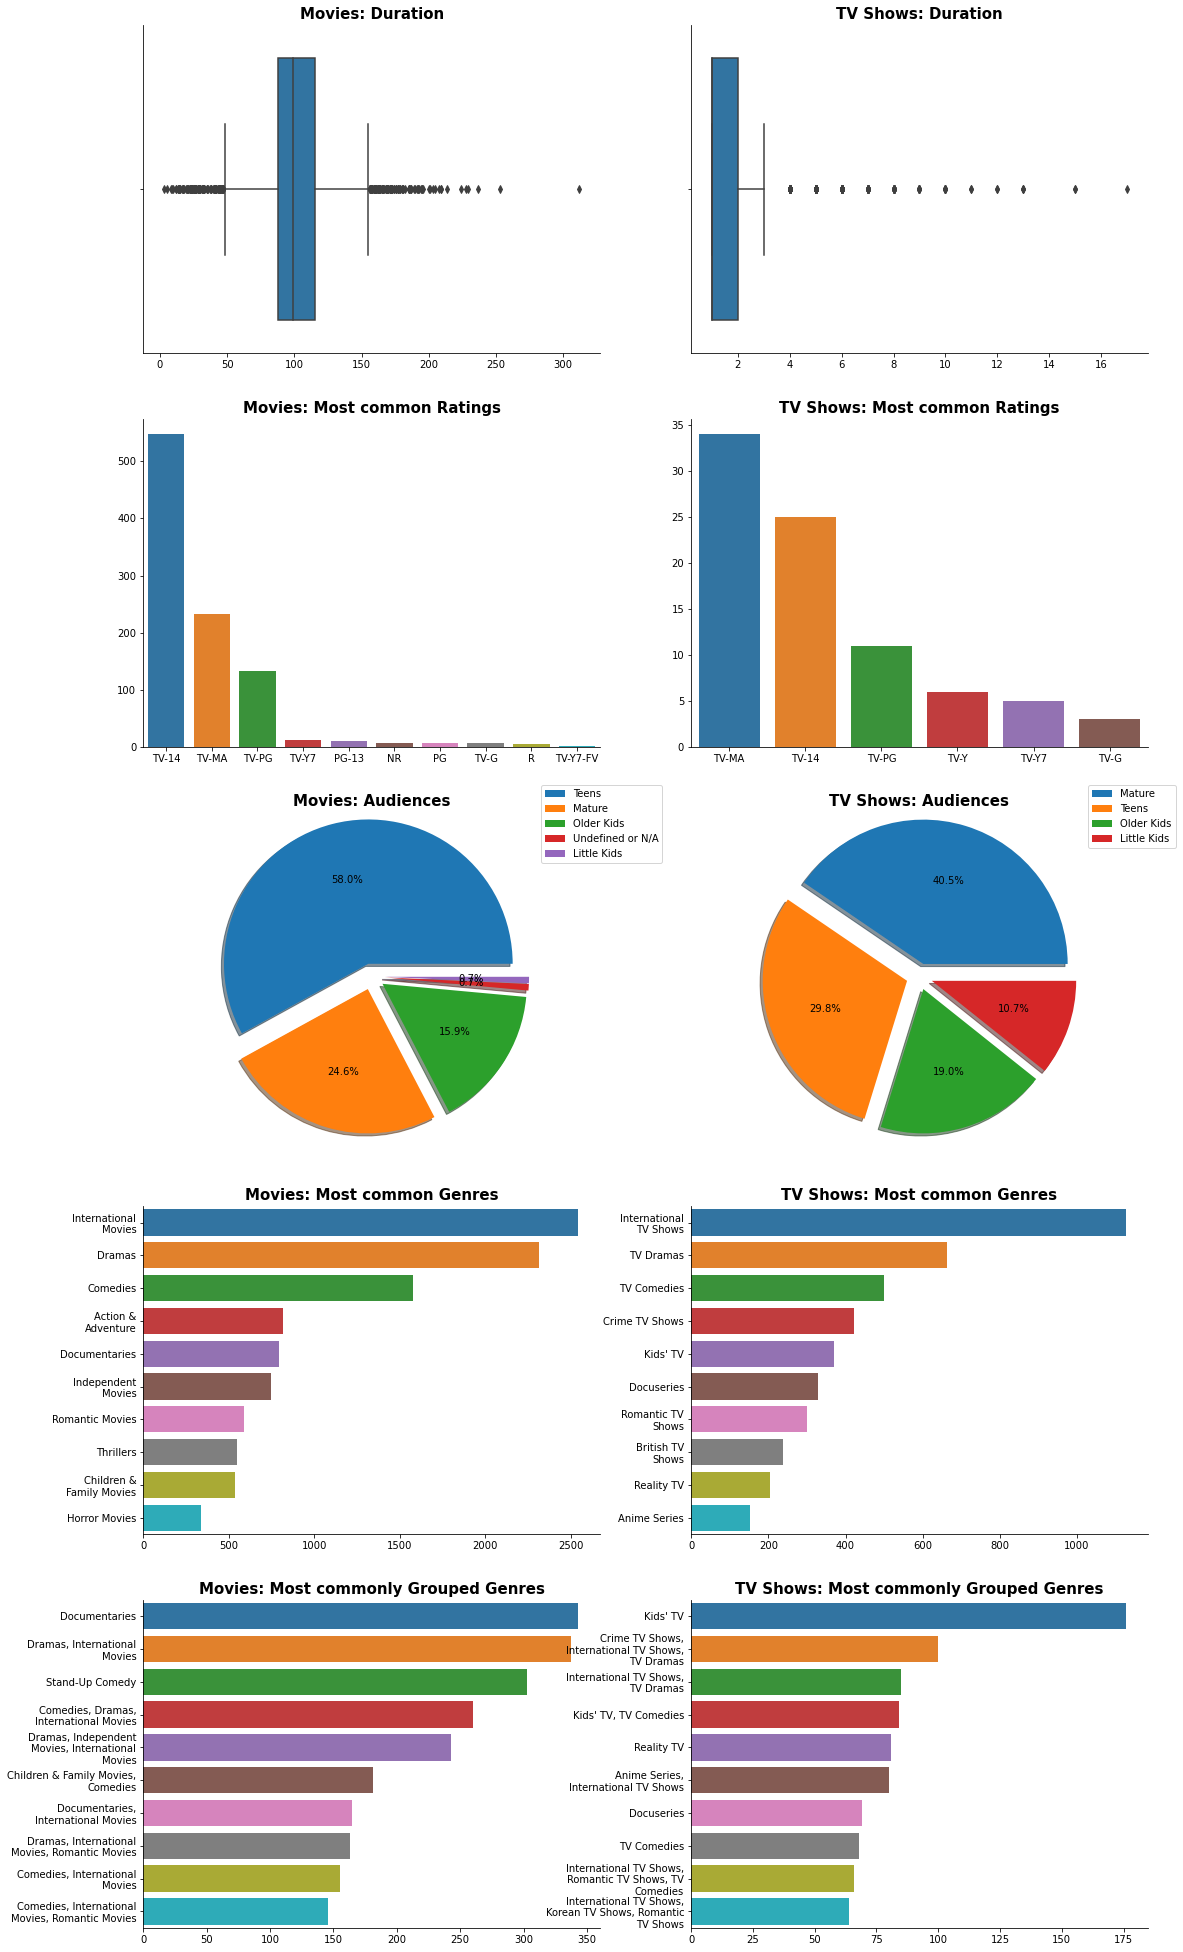

In [182]:
profile_country(netflix, 'Pakistan')

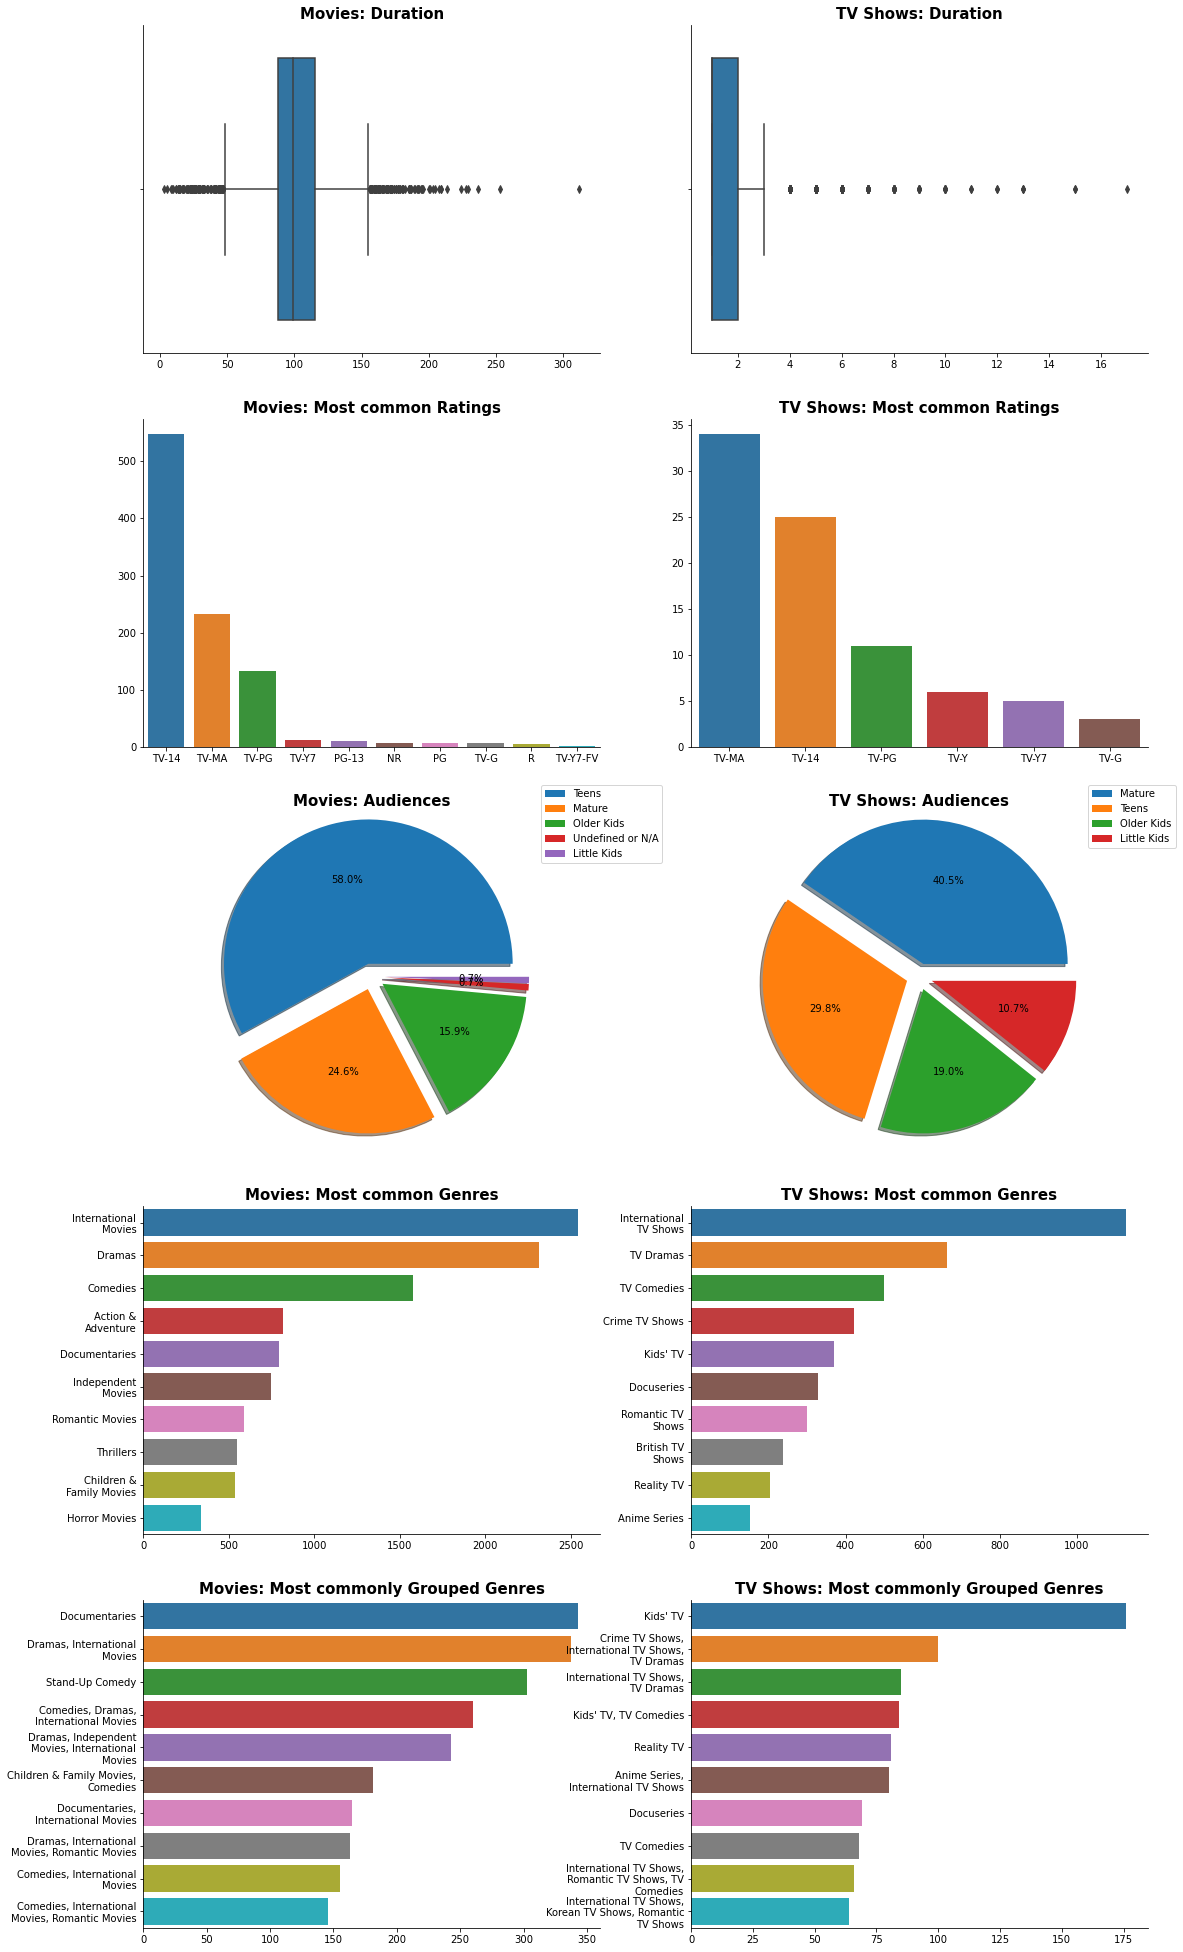

In [183]:
profile_country(netflix, 'India')

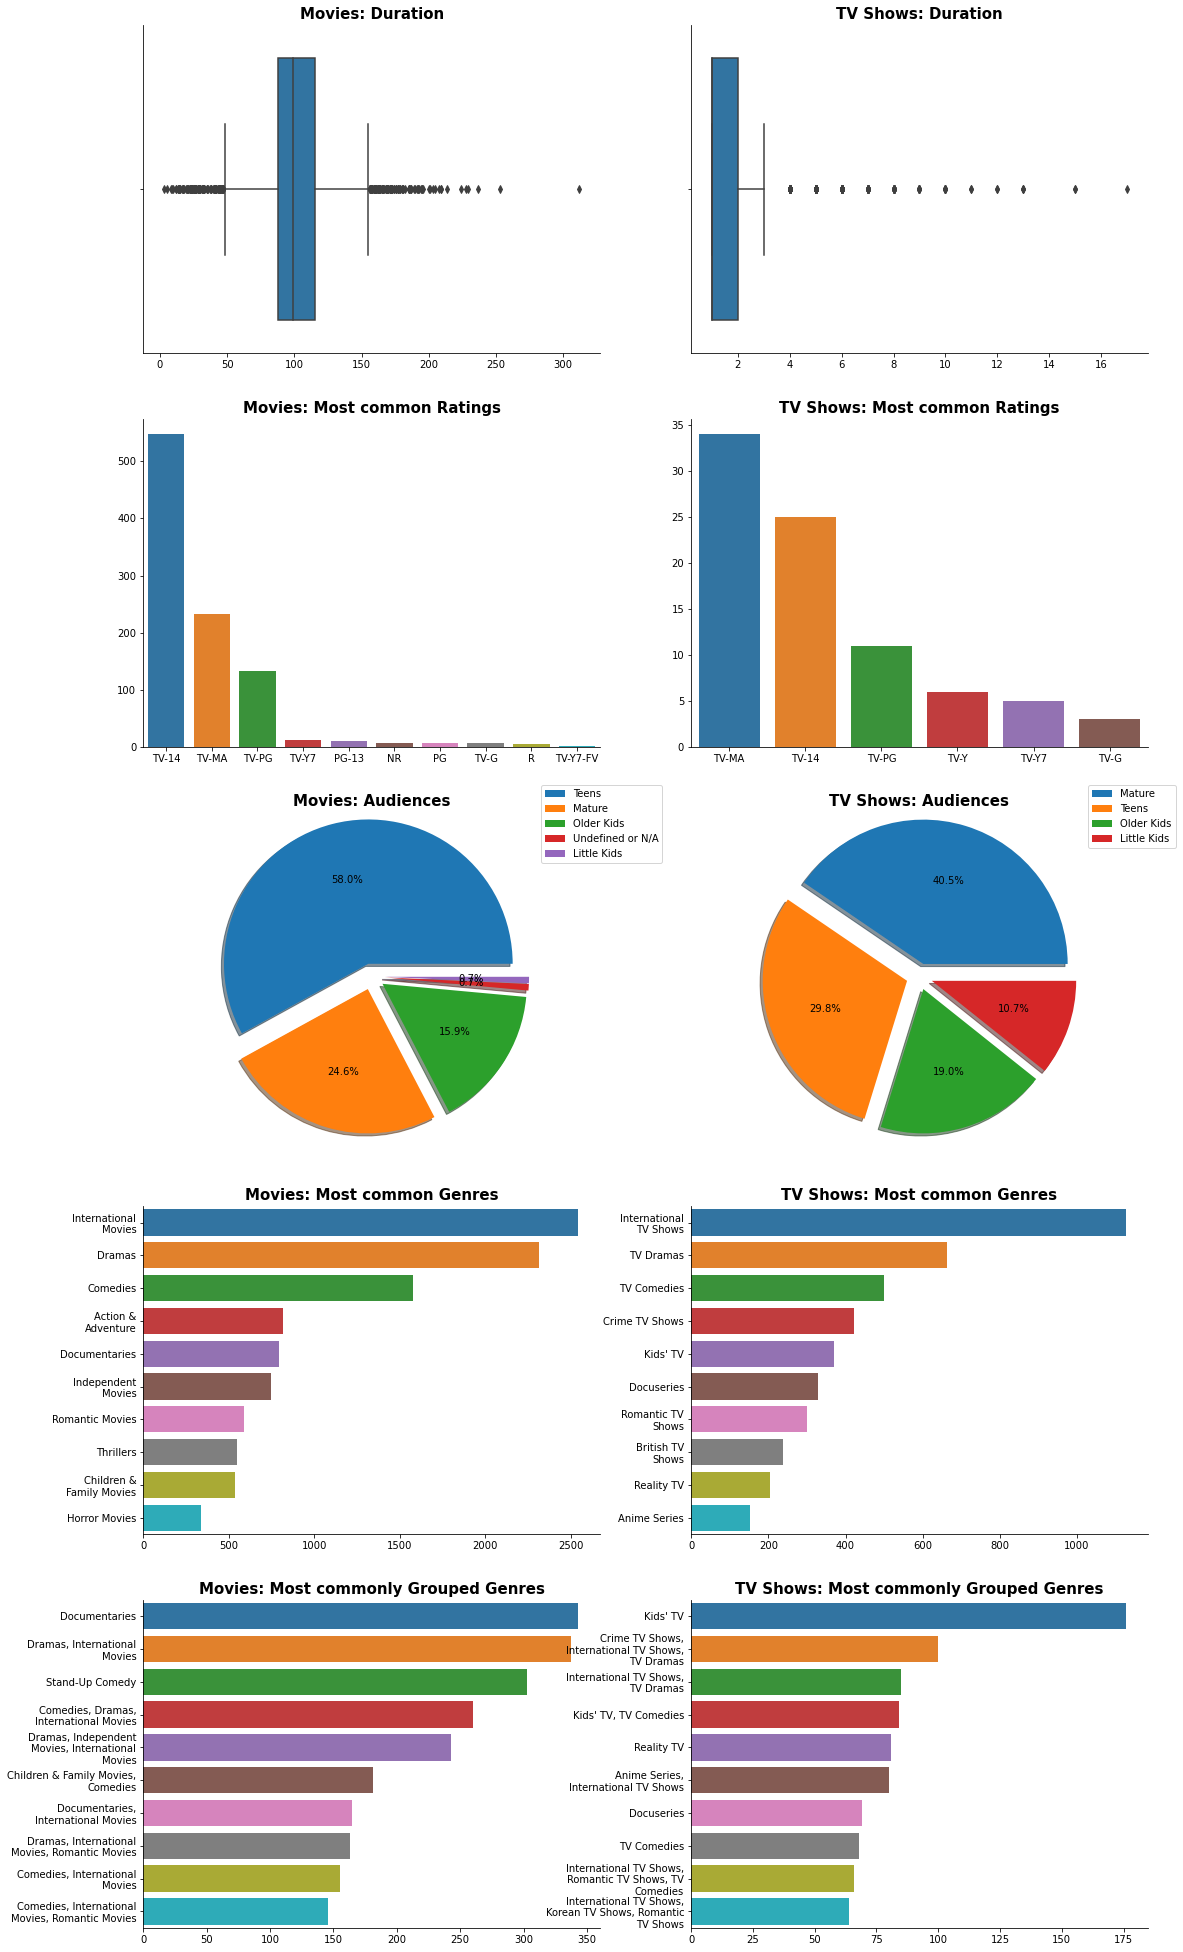

In [184]:
profile_country(netflix,'United States')

### Comparison of content in the top countries with respect to the following
- Type `type`
- Audience `audience`
- Genres `listed_in`

In [185]:
# netflix_ed1 is yet to be updated with rating map and populated with 'audience'
netflix_ed1['audience'] = netflix_ed1['rating'].map(rating_map)

In [249]:
pivot_type = netflix_ed1.pivot_table(index=['country'], columns=['type'], aggfunc='size', fill_value=0)
pivot_type

type,Movie,TV Show
country,,
Australia,94,66
Canada,319,126
China,114,48
Egypt,102,15
France,303,90
Germany,182,44
Hong Kong,100,5
India,962,84
Japan,119,199


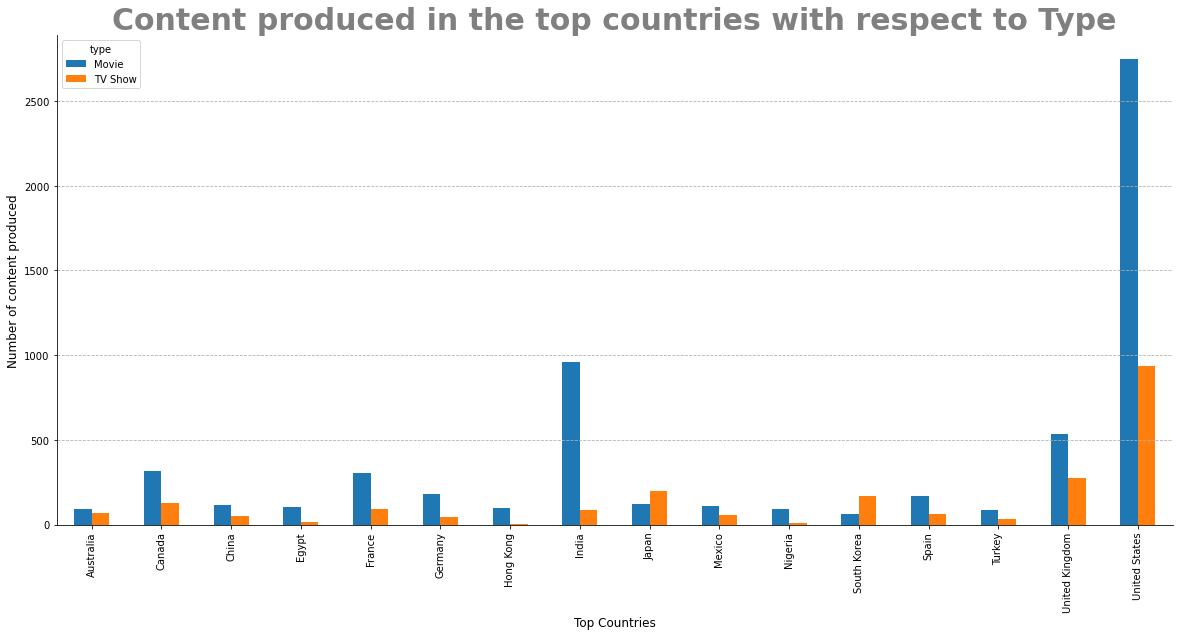

In [250]:
pivot_type.plot.bar(figsize=(20,9))

# plot
plt.xlabel('Top Countries', fontsize=12)
plt.ylabel('Number of content produced', fontsize=12)
plt.title('Content produced in the top countries with respect to Type', 
          weight='bold', color='grey',
          fontsize=30)
plt.grid(axis='y', ls='--')
sns.despine()



sns.despine()

In [246]:
pivot_audience = netflix_ed1.pivot_table(index=['country'], columns=['audience'], aggfunc='size', fill_value=0)
pivot_audience

audience,Little Kids,Mature,Older Kids,Teens,Undefined or N/A
country,,,,,
Australia,18,65,41,32,4
Canada,64,187,108,81,5
China,10,54,25,71,2
Egypt,1,33,6,77,0
France,29,221,54,83,6
Germany,13,122,31,58,2
Hong Kong,0,52,7,44,2
India,16,271,169,583,7
Japan,6,110,93,108,1


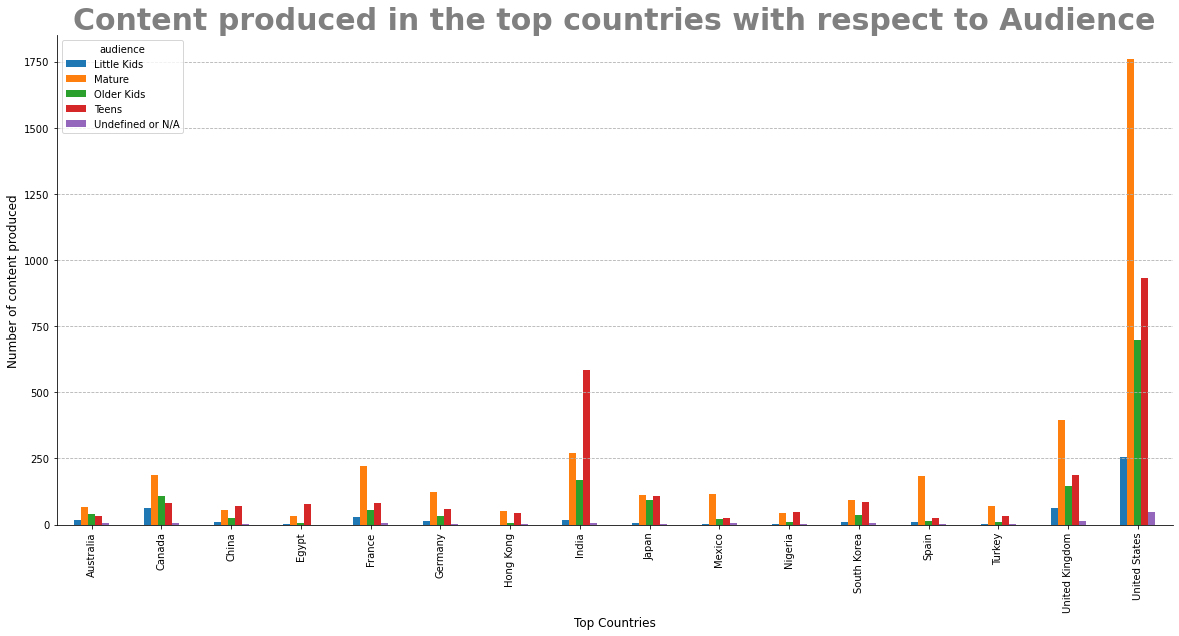

In [248]:
pivot_audience.plot.bar(figsize=(20,9))

# plot
plt.xlabel('Top Countries', fontsize=12)
plt.ylabel('Number of content produced', fontsize=12)
plt.title('Content produced in the top countries with respect to Audience', 
          weight='bold', color='grey',
          fontsize=30)
plt.grid(axis='y', ls='--')
sns.despine()



sns.despine()

In [251]:
pivot_audience_type = netflix_ed1.pivot_table(index=['country'], columns=['audience', 'type'], aggfunc='size', fill_value=0)
pivot_audience_type

audience       Little Kids         Mature         Older Kids         Teens  \
type                 Movie TV Show  Movie TV Show      Movie TV Show Movie   
country                                                                      
Australia                8      10     39      26         22      19    22   
Canada                  35      29    152      35         66      42    61   
China                    3       7     49       5         19       6    41   
Egypt                    1       0     30       3          6       0    65   
France                   6      23    178      43         33      21    80   
Germany                  8       5     97      25         22       9    53   
Hong Kong                0       0     49       3          7       0    42   
India                    7       9    237      34        153      16   558   
Japan                    2       4     41      69         44      49    32   
Mexico                   2       1     79      37         10      10    16   
Nigeria                  0       1     39       5         10       0    44   
South Korea              2       9     39      55         11      24     5   
Spain                    5       4    138      46          9       6    19   
Turkey                   1       0     50      19          7       2    23   
United Kingdom          19      44    281     115         79      66   142   
United States          138     117   1379     382        480     216   709   

audience               Undefined or N/A          
type           TV Show            Movie TV Show  
country                                          
Australia           10                3       1  
Canada              20                5       0  
China               30                2       0  
Egypt               12                0       0  
France               3                6       0  
Germany              5                2       0  
Hong Kong            2                2       0  
India               25                7       0  
Japan               76                0       1  
Mexico              10                4       0  
Nigeria              3                1       0  
South Korea         82                4       0  
Spain                4                0       1  
Turkey               9                2       0  
United Kingdom      45               11       2  
United States      221               45       2

As we are generating an analysis to compare **only the top countries**, lets filter it for those countries

In [109]:
pivot_listedin = netflix_ed2.pivot_table(index=['country'], columns=['listed_in'], aggfunc='size', fill_value=0)
pivot_listedin

listed_in,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,3,0,0,1,9,0,2,5,6,0,6,9,15,0,1,4,14,27,11,0,3,3,3,11,1,2,2,5,0,5,3,0,0,15,15,1,1,0,0,1,2,3
Canada,12,0,0,0,31,1,0,39,9,3,21,8,22,1,7,15,26,19,20,1,3,3,4,9,15,1,6,3,0,6,2,0,2,14,18,3,3,2,0,4,2,12
China,15,1,2,0,1,0,0,8,3,0,0,1,11,0,0,0,26,37,1,0,0,0,0,0,4,20,4,0,0,0,0,0,7,10,18,0,1,3,0,0,5,2
Egypt,14,0,0,0,1,0,6,57,2,0,0,0,37,0,3,3,89,14,0,0,0,0,3,0,11,3,0,0,0,1,0,0,0,4,11,1,2,1,0,0,0,4
France,12,0,0,0,1,0,0,18,14,0,24,5,31,0,1,9,68,32,16,0,1,0,5,2,4,2,1,0,0,7,5,1,3,14,20,3,2,0,0,2,0,3
Germany,2,0,0,1,7,0,0,13,7,0,7,2,16,0,1,6,35,20,0,0,1,0,5,2,3,1,0,0,0,2,5,1,2,3,12,0,1,1,0,0,0,5
Hong Kong,28,0,0,0,0,0,0,23,1,3,0,0,14,0,0,2,49,3,0,0,0,0,0,0,6,1,1,0,0,1,0,0,0,1,3,0,0,0,0,0,0,1
India,127,0,0,2,18,0,11,308,8,5,19,8,620,3,32,150,817,65,10,0,2,0,88,5,118,11,10,0,0,15,6,3,5,26,27,7,2,3,3,3,1,88
Japan,46,54,131,0,10,0,1,0,15,0,0,1,12,0,2,0,58,141,13,0,1,1,3,6,3,21,6,0,0,0,0,1,4,7,20,4,4,0,1,5,14,3


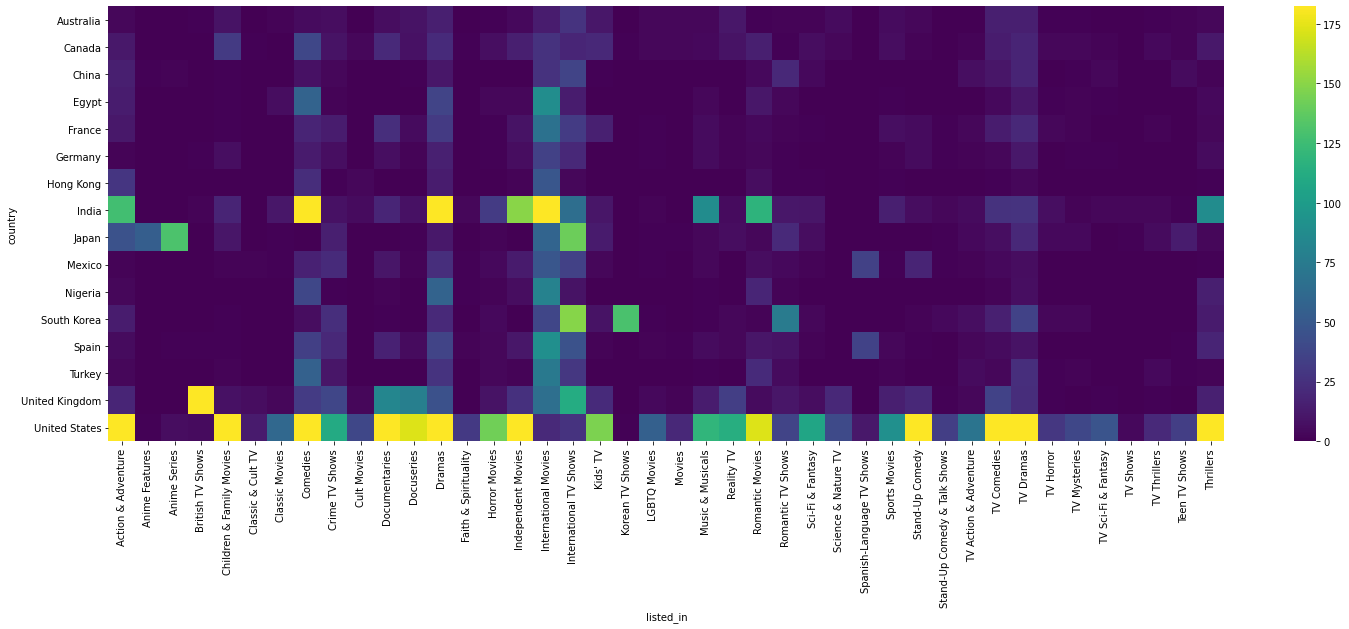

In [265]:
plt.figure(figsize=(25,8))
sns.heatmap(pivot_listedin,cmap="viridis", robust=True)

In [105]:
pivot_type_listedin = netflix_ed2.pivot_table(index=['country'], columns=['type', 'listed_in'], aggfunc='size', fill_value=0)
pivot_type_listedin

type                        Movie                                          \
listed_in      Action & Adventure Anime Features Children & Family Movies   
country                                                                     
Australia                       3              0                        9   
Canada                         12              0                       31   
China                          15              1                        1   
Egypt                          14              0                        1   
France                         12              0                        1   
Germany                         2              0                        7   
Hong Kong                      28              0                        0   
India                         127              0                       18   
Japan                          46             54                       10   
Mexico                          2              0                        2   
Nigeria                         3              0                        0   
South Korea                    14              0                        1   
Spain                           5              0                        1   
Turkey                          3              0                        2   
United Kingdom                 19              0                        8   
United States                 249              1                      272   

type                                                                     \
listed_in      Classic Movies Comedies Cult Movies Documentaries Dramas   
country                                                                   
Australia                   2        5           0             6     15   
Canada                      0       39           3            21     22   
China                       0        8           0             0     11   
Egypt                       6       57           0             0     37   
France                      0       18           0            24     31   
Germany                     0       13           0             7     16   
Hong Kong                   0       23           3             0     14   
India                      11      308           5            19    620   
Japan                       1        0           0             0     12   
Mexico                      1       17           0            10     24   
Nigeria                     0       39           0             2     57   
South Korea                 0        6           0             1     21   
Spain                       0       34           0            17     37   
Turkey                      0       56           0             0     27   
United Kingdom              3       32           3            84     45   
United States              61      524          39           411    591   

type                                                                  \
listed_in      Faith & Spirituality Horror Movies Independent Movies   
country                                                                
Australia                         0             1                  4   
Canada                            1             7                 15   
China                             0             0                  0   
Egypt                             0             3                  3   
France                            0             1                  9   
Germany                           0             1                  6   
Hong Kong                         0             0                  2   
India                             3            32                150   
Japan                             0             2                  0   
Mexico                            1             4                 13   
Nigeria                           1             2                  6   
South Korea                       0             4                  0   
Spain                         

---